## Libraries

In [7]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
import seaborn as sns
from keras.layers import Dense # importing dense layer
from keras.models import Sequential

## Columns Names

In [8]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

## Read the dataset

In [9]:
# importing dataset
data = pd.read_csv('KDDTrain+.txt',header=None, names=col_names)
print("Original Dataset \n " , data)
# remove attribute 'difficulty_level'
data.drop(['difficulty_level'],axis=1,inplace=True)
data.shape

Original Dataset 
          duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0              0           tcp  ftp_data   SF        491          0     0   
1              0           udp     other   SF        146          0     0   
2              0           tcp   private   S0          0          0     0   
3              0           tcp      http   SF        232       8153     0   
4              0           tcp      http   SF        199        420     0   
...          ...           ...       ...  ...        ...        ...   ...   
125968         0           tcp   private   S0          0          0     0   
125969         8           udp   private   SF        105        145     0   
125970         0           tcp      smtp   SF       2231        384     0   
125971         0           tcp    klogin   S0          0          0     0   
125972         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_same

(125973, 42)

## Change attack label to their attack class

In [10]:
# changing attack labels to their respective attack class
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail',
       'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

# calling change_label() function
change_label(data)

C:\Users\ZIAD\AppData\Local\Temp\ipykernel_25904\443160792.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)


## determine numeric attributes columns from data

In [11]:
numeric_col = data.select_dtypes(include='number').columns

## Using standard scaler for normalizing

In [12]:
std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df
# calling the normalization() function
data = normalization(data.copy(),numeric_col)
print("Dataset after normalization \n " , data)

Dataset after normalization 
          duration protocol_type   service flag  src_bytes  dst_bytes      land  \
0      -0.110249           tcp  ftp_data   SF  -0.007679  -0.004919 -0.014089   
1      -0.110249           udp     other   SF  -0.007737  -0.004919 -0.014089   
2      -0.110249           tcp   private   S0  -0.007762  -0.004919 -0.014089   
3      -0.110249           tcp      http   SF  -0.007723  -0.002891 -0.014089   
4      -0.110249           tcp      http   SF  -0.007728  -0.004814 -0.014089   
...          ...           ...       ...  ...        ...        ...       ...   
125968 -0.110249           tcp   private   S0  -0.007762  -0.004919 -0.014089   
125969 -0.107178           udp   private   SF  -0.007744  -0.004883 -0.014089   
125970 -0.110249           tcp      smtp   SF  -0.007382  -0.004823 -0.014089   
125971 -0.110249           tcp    klogin   S0  -0.007762  -0.004919 -0.014089   
125972 -0.110249           tcp  ftp_data   SF  -0.007737  -0.004919 -0.014089 

In [13]:
cate_cols = list(set(data.columns)-set(numeric_col))
print("Cate cols : \n " , cate_cols)
print("=" * 100)

Cate cols : 
  ['service', 'flag', 'label', 'protocol_type']


## Drop columns with NAN 

In [14]:
data = data.dropna(axis='columns')
ndf = data[[col for col in data.columns if data[col].nunique()>1 and pd.api.types.is_numeric_dtype(data[col])]]
corr = ndf.corr()                          
print (corr)

                             duration  src_bytes  dst_bytes      land  \
duration                     1.000000   0.070737   0.034878 -0.001553   
src_bytes                    0.070737   1.000000   0.000204 -0.000109   
dst_bytes                    0.034878   0.000204   1.000000 -0.000069   
land                        -0.001553  -0.000109  -0.000069  1.000000   
wrong_fragment              -0.009866  -0.000693  -0.000440 -0.001261   
urgent                       0.003830  -0.000059   0.000248 -0.000109   
hot                          0.000705   0.000295  -0.000344 -0.001340   
num_failed_logins            0.009528  -0.000208   0.000504 -0.000381   
logged_in                   -0.064218  -0.003353  -0.002894 -0.011402   
num_compromised              0.042679  -0.000086   0.001233 -0.000164   
root_shell                   0.052791  -0.000272   0.001069 -0.000516   
su_attempted                 0.087183  -0.000186   0.001133 -0.000344   
num_root                     0.045519  -0.000093   

## Drop features that have the same correlation with other features as this will not affect in prediction

In [15]:
data.drop('num_root' , axis = 1 , inplace=True)
data.drop('srv_serror_rate' , axis = 1 , inplace= True )
data.drop('srv_rerror_rate' , axis = 1 , inplace= True )
data.drop('dst_host_srv_serror_rate' , axis = 1 , inplace= True )
data.drop('dst_host_serror_rate' , axis = 1 , inplace= True )
data.drop('dst_host_rerror_rate' , axis = 1 , inplace= True )
data.drop('dst_host_srv_rerror_rate' , axis = 1 , inplace= True )
data.drop('dst_host_same_srv_rate' , axis = 1 , inplace= True )

## Mapping

In [16]:
# Protocol type feature  mapping 
pmap = {'icmp' :0 , 'tcp' :1 , 'udp' :2}
data['protocol_type'] = data['protocol_type'].map(pmap)

#flag feature mapping
fmap = {'SF' :0 , 'S0' :1 , 'REJ' :2 , 'RSTR' :3 ,'RSTO' :4 , 'SH' :5 , 'S1' :6 , 'S2' :7 , 'RSTOS0' :8 , 'S3' :9 , 'OTH' :10}
data['flag'] = data['flag'].map(fmap)
data.drop('service' , axis=1 , inplace=True) 
print("Dataset after dropping correlated features and handling categorical features \n" , data )

Dataset after dropping correlated features and handling categorical features 
         duration  protocol_type  flag  src_bytes  dst_bytes      land  \
0      -0.110249              1     0  -0.007679  -0.004919 -0.014089   
1      -0.110249              2     0  -0.007737  -0.004919 -0.014089   
2      -0.110249              1     1  -0.007762  -0.004919 -0.014089   
3      -0.110249              1     0  -0.007723  -0.002891 -0.014089   
4      -0.110249              1     0  -0.007728  -0.004814 -0.014089   
...          ...            ...   ...        ...        ...       ...   
125968 -0.110249              1     1  -0.007762  -0.004919 -0.014089   
125969 -0.107178              2     0  -0.007744  -0.004883 -0.014089   
125970 -0.110249              1     0  -0.007382  -0.004823 -0.014089   
125971 -0.110249              1     1  -0.007762  -0.004919 -0.014089   
125972 -0.110249              1     0  -0.007737  -0.004919 -0.014089   

        wrong_fragment    urgent       hot  

## changing attack labels into two categories 'normal' and 'abnormal'

In [17]:
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))

# creating a dataframe with binary labels (normal,abnormal)

In [18]:
bin_data = data.copy()
bin_data['label'] = bin_label

# label encoding (0,1) binary labels (abnormal,normal)

In [19]:
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['intrusion'] = enc_label
print("Dataset of binary labels \n" , bin_data)
print("="*100)
print("Number of rows and columns : " , bin_data.shape)

Dataset of binary labels 


         duration  protocol_type  flag  src_bytes  dst_bytes      land  \
0      -0.110249              1     0  -0.007679  -0.004919 -0.014089   
1      -0.110249              2     0  -0.007737  -0.004919 -0.014089   
2      -0.110249              1     1  -0.007762  -0.004919 -0.014089   
3      -0.110249              1     0  -0.007723  -0.002891 -0.014089   
4      -0.110249              1     0  -0.007728  -0.004814 -0.014089   
...          ...            ...   ...        ...        ...       ...   
125968 -0.110249              1     1  -0.007762  -0.004919 -0.014089   
125969 -0.107178              2     0  -0.007744  -0.004883 -0.014089   
125970 -0.110249              1     0  -0.007382  -0.004823 -0.014089   
125971 -0.110249              1     1  -0.007762  -0.004919 -0.014089   
125972 -0.110249              1     0  -0.007737  -0.004919 -0.014089   

        wrong_fragment    urgent       hot  num_failed_logins  ...  \
0            -0.089486 -0.007736 -0.095076          

# pie chart distribution of normal and abnormal labels

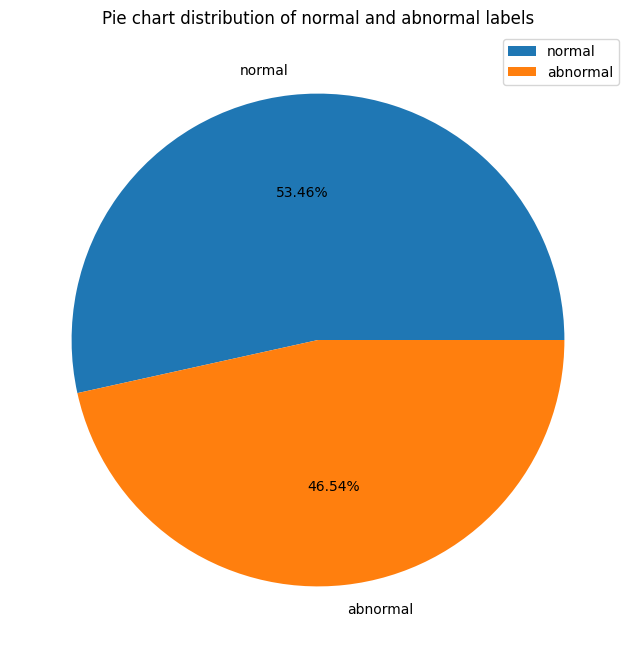

In [20]:
plt.figure(figsize=(8,8))
plt.pie(bin_data.label.value_counts(),labels=bin_data.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.show()

## Dataset splitting

In [21]:
X = bin_data.iloc[:,0:32].values # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data[['intrusion']].values # target attribute

# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

## Modeling

In [22]:
# Creating the model
mlp = Sequential()
# Adding input layer and first hidden layer with 50 neurons
mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# Adding second hidden layer with 30 neurons
mlp.add(Dense(units=30, activation='relu'))
# Output layer with sigmoid activation
mlp.add(Dense(units=1, activation='sigmoid'))
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# summary of model layers
mlp.summary()

C:\Users\ZIAD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │         1,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,211 (12.54 KB)

 Trainable params: 3,211 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

## Preparing train dataset

In [23]:
X_train = np.nan_to_num(X_train)  # Replace NaN and Infinity with finite values
y_train = np.nan_to_num(y_train)
X_train = X_train.astype(np.float32)  # Convert to float32
y_train = y_train.astype(np.float32)

## Train the model

In [24]:
history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6722 - loss: 0.6249 - val_accuracy: 0.8960 - val_loss: 0.3717
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9105 - loss: 0.3207 - val_accuracy: 0.9327 - val_loss: 0.2273
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9370 - loss: 0.2012 - val_accuracy: 0.9487 - val_loss: 0.1647
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9500 - loss: 0.1516 - val_accuracy: 0.9586 - val_loss: 0.1373
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9591 - loss: 0.1272 - val_accuracy: 0.9617 - val_loss: 0.1246
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9609 - loss: 0.1162 - val_accuracy: 0.9627 - val_loss: 0.1165
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9621 - loss: 0.1086 - val_accuracy: 0.9638 - val_loss: 0.1105
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9628 - loss: 0.1050 - val_accuracy: 0.

## Prediction

In [25]:
X_test = np.nan_to_num(X_test)  # Replace NaN and Infinity with finite values
y_test = np.nan_to_num(y_test)
X_test = X_test.astype(np.float32)  # Convert to float32
y_test = y_test.astype(np.float32)
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

985/985 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9911 - loss: 0.0290
Test results - Loss: 0.027881788089871407 - Accuracy: 99.12364482879639


# Plot of accuracy vs epoch of train and test dataset

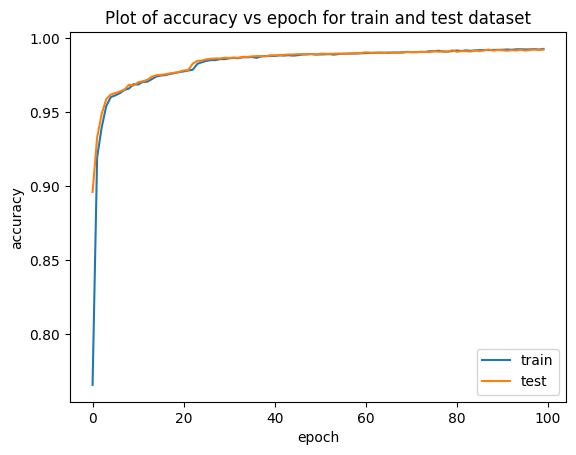

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# Plot of loss vs epoch of train and test dataset

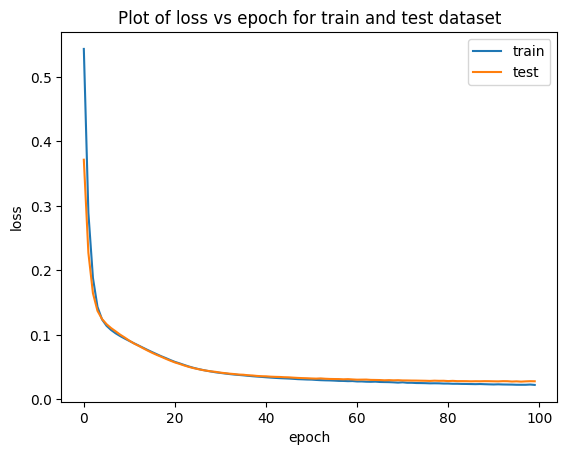

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Plot of loss vs epoch for train and test dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [28]:
y_pred = mlp.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


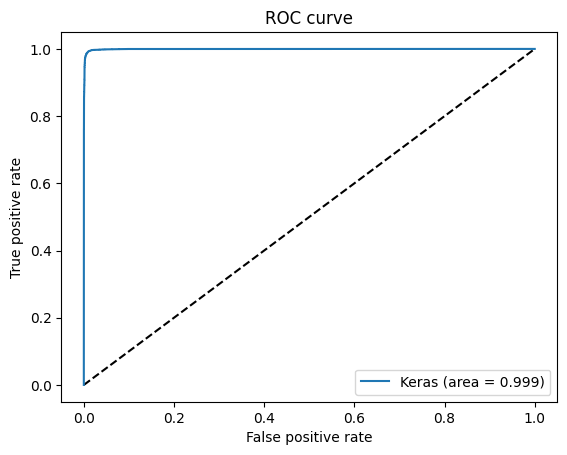

In [29]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [30]:
pred = mlp.predict(X_test)
y_classes = (mlp.predict(X_test)>0.5).astype('int32')

985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [31]:
print("Accuracy - ",accuracy_score(y_test,y_classes))
print("Recall Score - ",recall_score(y_test,y_classes))
print("F1 Score - ",f1_score(y_test,y_classes))
print("Precision Score - ",precision_score(y_test,y_classes))
print("ROC-AUC score - ",roc_auc_score(y_test,y_classes))

Accuracy -  0.9912364259859021
Recall Score -  0.9922499105758913
F1 Score -  0.9917769038255273
Precision Score -  0.991304347826087
ROC-AUC score -  0.9911657161575108


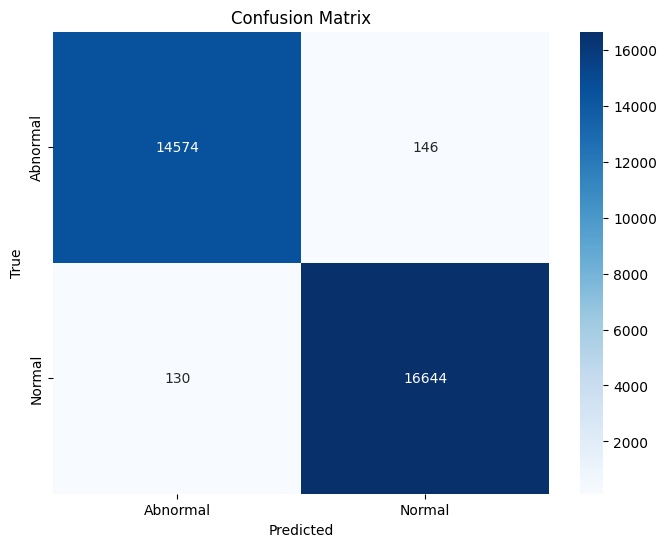

In [32]:
cm = confusion_matrix(y_test, y_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Abnormal', 'Normal'], yticklabels=['Abnormal', 'Normal'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

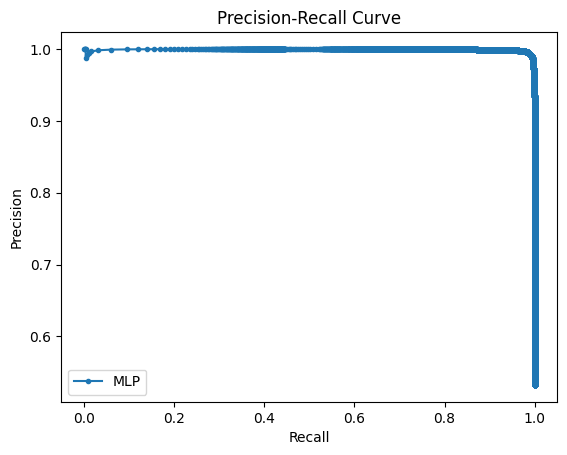

In [33]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, marker='.', label='MLP')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Loss Curve

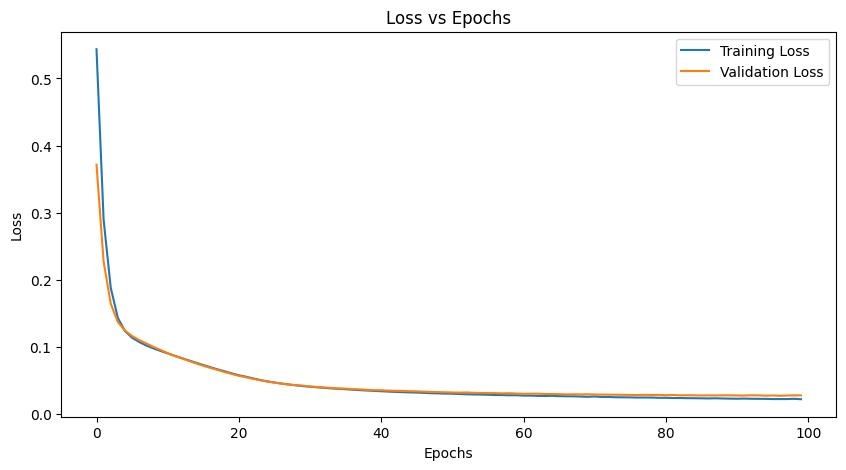

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy Curve

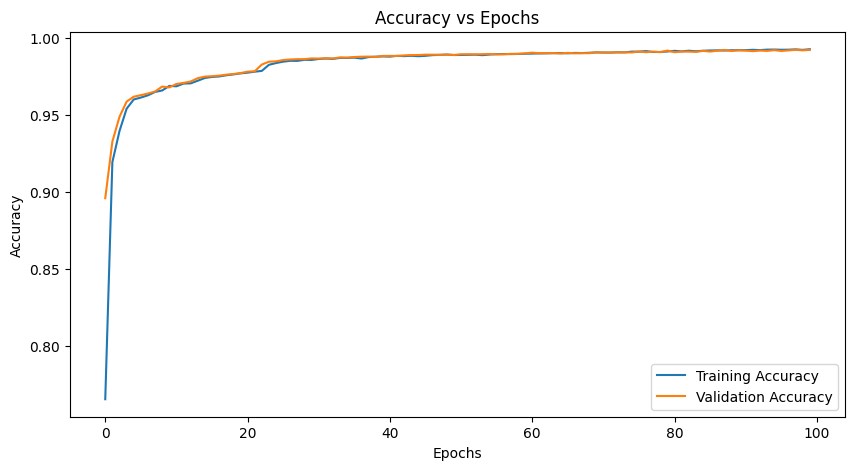

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

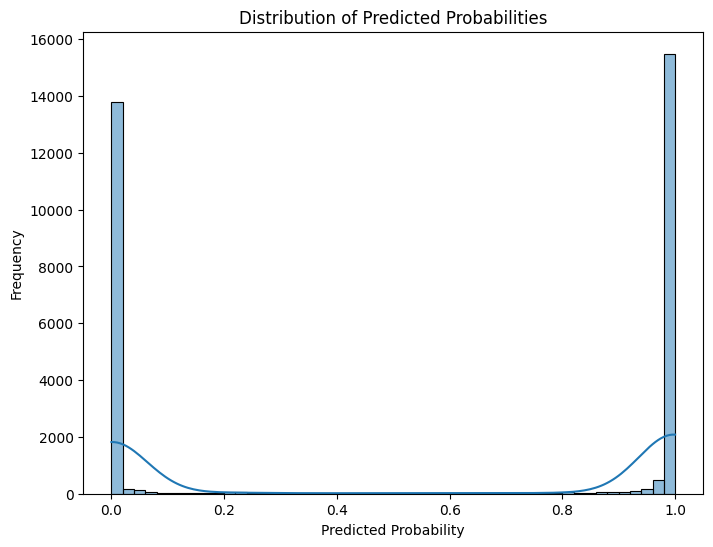

In [36]:
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, bins=50, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

# Extract the weights of the input layer (first layer) from the trained model

In [37]:
input_weights = mlp.layers[0].get_weights()[0]  # Shape: (input_dim, num_neurons_in_first_hidden_layer)

# Calculate feature importance as the mean of the absolute values of the weights for each feature

In [38]:
feature_importance = np.mean(np.abs(input_weights), axis=1)

# Get the feature names from the dataset (assuming X_train corresponds to the features)

In [39]:
feature_names = bin_data.columns[:X_train.shape[1]] # Adjust the range to include the feature columns in X_train

# Plot the feature importance

C:\Users\ZIAD\AppData\Local\Temp\ipykernel_25904\3564775447.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_names, palette='viridis')


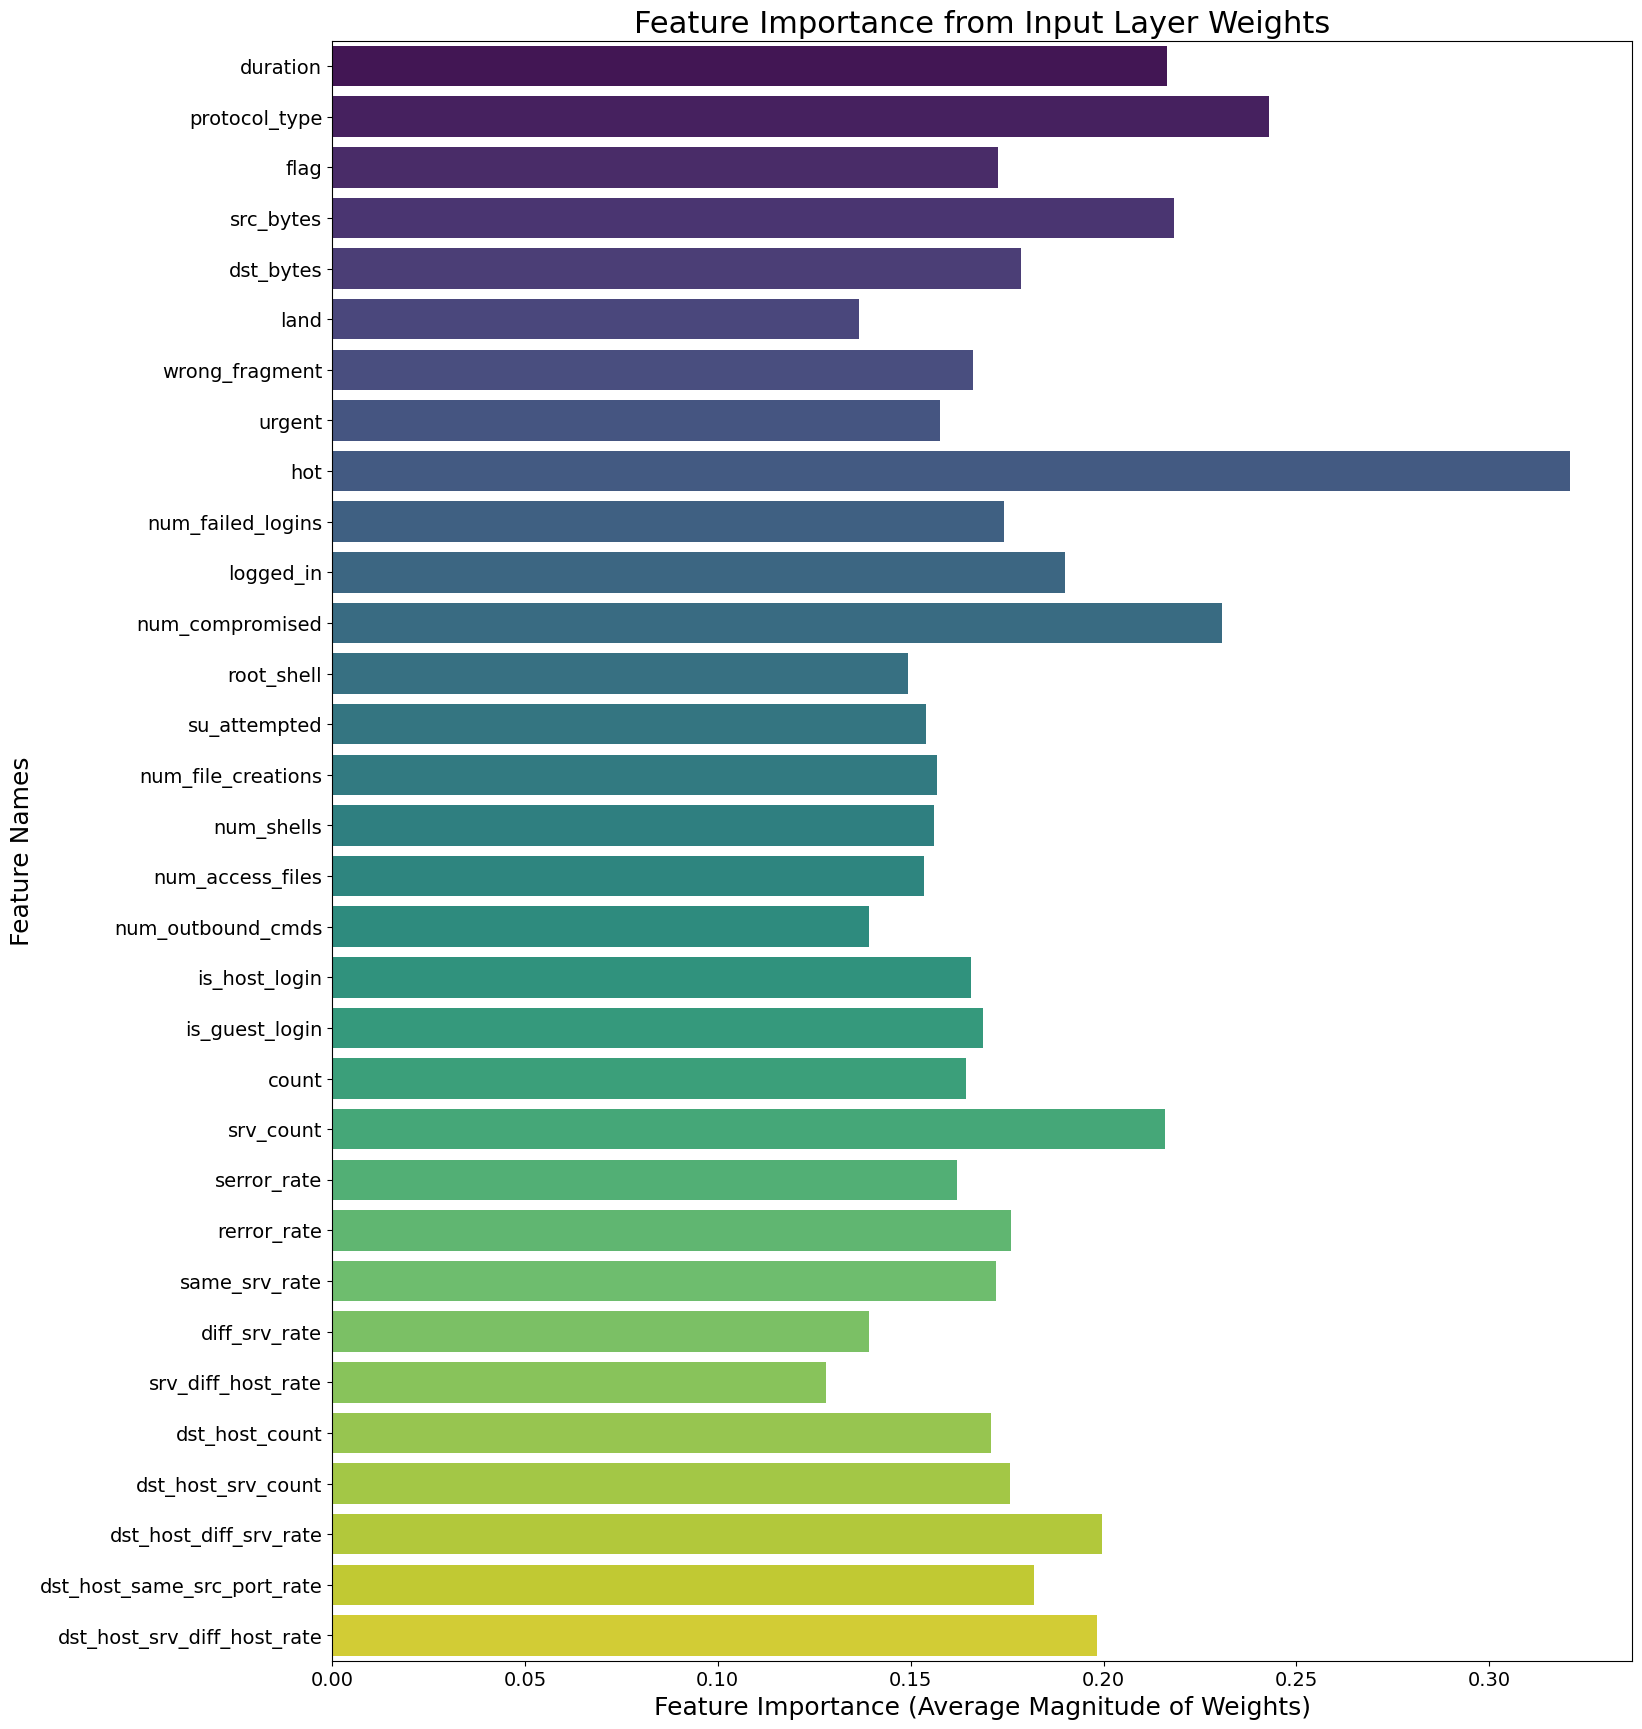

In [40]:
plt.figure(figsize=(20, 18))  # Adjust size for clarity
sns.barplot(x=feature_importance, y=feature_names, palette='viridis')
plt.title('Feature Importance from Input Layer Weights', fontsize=22)
plt.xlabel('Feature Importance (Average Magnitude of Weights)', fontsize=18)
plt.ylabel('Feature Names', fontsize=18)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(fontsize=14)
plt.subplots_adjust(left=0.2, right=0.85, top=0.95, bottom=0.05)
plt.show()

In [42]:
#MITIGATION
import json
# Load the data (assuming your JSON data is saved in a file called 'mitre_data.json')
with open('2.json', 'r') as file:
    attack_data = json.load(file)

def search_attack_by_name(data, attack_name):
    for attack in data:
        if attack['name'].lower() == attack_name.lower():
            return attack
    return None  # If the attack name is not found

# Example search for a specific attack
search_name = input("Enter the attack name you want to search for: ")
attack = search_attack_by_name(attack_data, search_name)

if attack:
    # Displaying the attack information
    print(f"Attack Name: {attack['name']}")
    print(f"Description: {attack['description']}")
    print(f"Domain: {attack['domain']}")
    print("Techniques:")
    for technique in attack['techniques']:
        print(f"  - Technique ID: {technique['techniqueID']}")
        print(f"    Comment: {technique['comment']}")
        print(f"    Score: {technique['score']}")
    print(f"Mitigation: {attack['mitigation']}")
else:
    print("Attack not found.")

def generate_attack_report(attack, filename="attack_report.txt"):
    # Open the file in write mode ('w') which overwrites the existing content
    with open(filename, 'w') as report_file:
        # Write attack details to the file
        report_file.write(f"*** Attack Report: {attack['name']} ***\n")
        report_file.write(f"Description: {attack['description']}\n")
        report_file.write(f"Domain: {attack['domain']}\n")
        report_file.write(f"Versions: Layer: {attack['versions']['layer']}, Attack: {attack['versions']['attack']}, Navigator: {attack['versions']['navigator']}\n")
        report_file.write("\nTechniques:\n")
        for technique in attack['techniques']:
            report_file.write(f"  - Technique ID: {technique['techniqueID']}\n")
            report_file.write(f"    Comment: {technique['comment']}\n")
            report_file.write(f"    Score: {technique['score']}\n")
            report_file.write(f"    Show Subtechniques: {technique['showSubtechniques']}\n")
        report_file.write(f"\nMitigation: {attack['mitigation']}\n")
        report_file.write("-" * 50 + "\n")  # Separator for readability


def print_attack_report(attack):
    """
    Function to print attack report in terminal and write it to a text file.
    This ensures consistent formatting between terminal and text file.
    """
    # Print to terminal
    print(f"*** Attack Report: {attack['name']} ***")
    print(f"Description: {attack['description']}")
    print(f"Domain: {attack['domain']}")
    print(f"Versions: Layer: {attack['versions']['layer']}, Attack: {attack['versions']['attack']}, Navigator: {attack['versions']['navigator']}")
    print("\nTechniques:")
    for technique in attack['techniques']:
        print(f"  - Technique ID: {technique['techniqueID']}")
        print(f"    Comment: {technique['comment']}")
        print(f"    Score: {technique['score']}")
        print(f"    Show Subtechniques: {technique['showSubtechniques']}")
    print(f"\nMitigation: {attack['mitigation']}")
    print("-" * 50)  # Separator for readability

    # Call function to write to the file (new report file will be generated)
generate_attack_report(attack)





Attack Name: Impact (T1499)
Description: Impact techniques are designed to destroy, disrupt, or degrade the integrity or availability of data, systems, or networks.
Domain: enterprise-attack
Techniques:
  - Technique ID: T1499
    Comment: Destructive techniques used to disrupt or destroy data, systems, or networks to achieve mission objectives.
    Score: 5
  - Technique ID: T1499.001
    Comment: Endpoint Denial of Service (DoS) is used to crash or degrade the performance of a system or endpoint, preventing it from functioning properly.
    Score: 4
  - Technique ID: T1499.002
    Comment: Network Denial of Service (DoS) involves overwhelming a network with traffic, preventing legitimate users from accessing network resources.
    Score: 4
Mitigation: Impact can be mitigated by employing disaster recovery and business continuity plans, implementing robust data backups, and ensuring system hardening to prevent unauthorized access.
